## <img src="./logo_UTN.svg" align="right" width="150" /> 
#### Procesamiento Digital de Señales

# Trabajo Práctico 2
#### Nombre y Apellido: Juan Lauría

***
## Ventanas


<div class="alert alert-block alert-info">
<b>1)</b> Implemente las funciones para generar las siguientes ventanas $w(k)$:

</div>

+ Bartlett ó triangular
+ Hann
+ Blackman
+ Flat-top



<div class="alert alert-block alert-success">
<b>Ayuda:</b> Puede consultar el capítulo 6.3 del libro de B. Porat para obtener las expresiones analíticas de cada ventana.

</div>

   a) Para cada ventana grafique $w(k)$ y el módulo de su espectro $ \lvert W(\Omega) \rvert $


<div class="alert alert-block alert-warning">
<img src="./ojo.svg" align="left" width="50" />  Normalice la amplitud máxima de todas las ventanas a 0 dB.
</div>

In [11]:
## Inicialización del Notebook del TP2

import numpy as npy
import scipy as spy
import matplotlib as mpl
import matplotlib.pyplot as plt
from pandas import DataFrame
from IPython.display import HTML

N  = 1000 # muestras
fs = 1000 # Hz

# Insertar aquí el código para inicializar tu notebook
########################################################
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Wed Oct  7 20:46:43 2020

@author: jbl
"""

import numpy as npy
import matplotlib.pyplot as plt
import scipy as spy


def mi_func_sen (vmax, dc, ff, ph, nn, fs):
    
   tt = npy.arange(nn/fs, step=1/fs)          
   
   xx = vmax * npy.sin((2 * npy.pi * ff * tt) + ph) + dc
   
   return tt,xx

def mi_ruido (N,fs,sigma,mu):
    tt = npy.arange(N/fs, step=1/fs)
    ruido = npy.random.normal(mu,sigma,N)
    
    return tt,ruido

def fft_modulo_fase (tt,senial,fs,N):
    df = fs / N
    ff = npy.linspace(0, (N-1)*df, N).flatten()
    
    #senial_fft = npy.fft.fft(senial)
    senial_fft = spy.fft.fft(senial)

    modulo = npy.abs(senial_fft)
    fase = npy.angle (senial_fft)
    fase [modulo < 1] = 0
    
    return ff[ff <= fs/2],(2/N)*modulo[ff <= fs/2],fase[ff <= fs/2]

def mi_func_ADC (vmax, signal,nbits):
    # q = vmax / (2**(nbits-1) - 1)
    # value = signal / q
    # samples = npy.round(value)
    # return samples

    mlevel = (2 ** (nbits - 1))
    qx = (2*vmax/mlevel) * npy.round( (mlevel/(2*vmax)) * signal )
    return qx



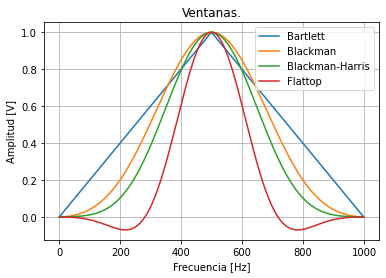

In [12]:
##########################################
# Acá podés generar los gráficos pedidos #
##########################################

import numpy as npy
import matplotlib.pyplot as plt
import scipy as spy
from scipy import signal
## Datos

fs = 1000
N  = 1000

#################################
#################################

lista_ventanas = []

tt = npy.arange(0,N)

## Creación de las 4 ventanas
lista_ventanas.append (spy.signal.bartlett(N)) # Ventana de Bartlett
lista_ventanas.append (spy.signal.blackman(N)) # Ventana de Blackman
lista_ventanas.append (spy.signal.blackmanharris(N)) # Ventana de Blackman-Harris
lista_ventanas.append (spy.signal.flattop(N)) # Ventana flattop
ventanas = ['Bartlett','Blackman','Blackman-Harris','Flattop']

## Ploteo de todas las ventanas.
plt.figure(1)
plt.title('Ventanas.')
for i in range(4):
    plt.plot(tt,lista_ventanas[i],label=ventanas[i])
plt.xlabel('Frecuencia [Hz]')
plt.ylabel('Amplitud [V]')
plt.grid()
plt.legend()
plt.show()

<ipython-input-13-fbb86ce22ecf>:27: RuntimeWarning: divide by zero encountered in log10
  tlog = 20 * npy.log10 (modulos) ## Escala logarítmica.


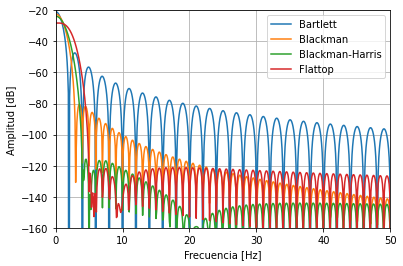

In [13]:
## Módulo FFT.
ceros = npy.zeros(int(10*N)) ## Vector de ceros.

modulos = []
lista_ff = []
tt = npy.arange(0,N + 10*N) ## Creo un nuevo vector de tiempo para el zero padding.

for i in range(4): ## Agrego los ceros a cada ventana.
    lista_ventanas[i] = npy.append(lista_ventanas[i],ceros)

## Aplico FFT y me quédo con el módulo.
ff1,mod1,fas = fft_modulo_fase(tt,lista_ventanas[0],fs,N + 10*N)
ff2,mod2,fas = fft_modulo_fase(tt,lista_ventanas[1],fs,N + 10*N)
ff3,mod3,fas = fft_modulo_fase(tt,lista_ventanas[2],fs,N + 10*N)
ff4,mod4,fas = fft_modulo_fase(tt,lista_ventanas[3],fs,N + 10*N)

## Armo 2 listas con módulos y vectores de frecuencia.
modulos.append(mod1)
modulos.append(mod2)
modulos.append(mod3)
modulos.append(mod4)
lista_ff.append(ff1)
lista_ff.append(ff2)
lista_ff.append(ff3)
lista_ff.append(ff4)

tlog = 20 * npy.log10 (modulos) ## Escala logarítmica.

plt.figure(2)
for i in range(4):
    plt.plot(lista_ff[i],tlog[i],label=ventanas[i])
plt.xlabel('Frecuencia [Hz]')
plt.ylabel('Amplitud [dB]')
plt.xlim(0,50)
plt.ylim(-160,-20)
plt.grid()
plt.legend()
plt.show()

Comentario: Falta normalizar escala por debajo de 0 dB.

b) Construya una tabla en la que figure la anchura normalizada del lóbulo principal  de la ventana, $\Omega_1$, siendo 

$$ \lvert W(\Omega_1) \rvert = \frac{\sqrt{2}}{2}$$ 

y el valor de transferencia máxima de los lóbulos secundarios expresado en dB 

$$ W_2 = \mathop{max} \{\lvert W(\Omega) \rvert\} ,\space\space \forall \space \Omega \geq \Omega_0 $$

siendo $\Omega_0$ la frecuencia del primer cruce por cero $\lvert W(\Omega) \rvert\ = 0$ ó la frecuencia límite superior del lóbulo principal. Utilice como norma de frecuencia la frecuencia de Nyquist, de manera que las mediciones de frecuencias sean adimensionales y comparables independientemente de la frecuencia de muestreo.

In [19]:

#######################################
# Tu simulación que genere resultados #
#######################################

tus_resultados = [ 
                   ['', ''], # <-- acá debería haber numeritos :)
                   ['', ''], # <-- acá debería haber numeritos :)
                   ['', ''], # <-- acá debería haber numeritos :)
                   ['', ''], # <-- acá debería haber numeritos :)
                   ['', ''] # <-- acá debería haber numeritos :)
                 ]
df = DataFrame(tus_resultados, columns=['$f_1$ (#)', '$W_2$ (dB)'],
               index=[  
                        'Rectangular',
                        'Bartlett',
                        'Hann',
                        'Blackman',
                        'Flat-top'
                     ])
HTML(df.to_html())


,$f_1$ (#),$W_2$ (dB)
Rectangular,,
Bartlett,,
Hann,,
Blackman,,
Flat-top,,


<div class="alert alert-block alert-info">
<b>2)</b> Genere una señal bitonal de las siguientes características
</div>


  $  x(k) = x_1(k) + x_2(k) $

  $  x_1(k) = sen(\Omega_1·k)$

  $  x_2(k) = a_2 · sen(\Omega_2·k)   $

siendo 

  $\Omega_1 = \frac{\pi}{2}$

  $\Omega_2 = \Omega_1 + 10·\frac{2\pi}{N}$

  $a_2 = -40$ dB


Responda a las siguientes consignas:

<div class="alert alert-block alert-info">
<b>2.a)</b>  Calcule el espectro $ \lvert X(\Omega) \rvert $

</div>

In [20]:
##########################################
# Acá podés generar los gráficos pedidos #
##########################################


<div class="alert alert-block alert-info">
<b>2.b)</b> Repita a) disminuyendo la amplitud de $x_2$.
</div>

¿Cuál es el factor de escala mínimo de $x_2$, definido como $a^0_2$, que permite evidenciar su existencia en el espectro de $\lvert X(\Omega) \rvert$ ?

<div class="alert alert-block alert-warning">
<b>Respuesta:</b> Escriba aquí su respuesta.
</div>

¿De qué depende poder medir $x_2$?

<div class="alert alert-block alert-warning">
<b>Respuesta:</b> Escriba aquí su respuesta.
</div>

Considere ahora que esta señal proviene de un ADC de 16 bits. Incorpore al análisis el correspondiente ruido de cuantización. ¿Cómo afecta esta situación la medición de $x_2$?

<div class="alert alert-block alert-warning">
<b>Respuesta:</b> Escriba aquí su respuesta.
</div>

In [21]:
##########################################
# Acá podés generar los gráficos pedidos #
##########################################


<div class="alert alert-block alert-info">
<b>2.c)</b> Repita a) incrementando la frecuencia de $x_1$ para $\Omega_1 = \frac{\pi}{2} + d_1·\frac{2\pi}{N}$ para valores de $d_1 = (0,01; 0.25; 0.5)$. Aumente la amplitud de $a_2$ hasta que se evidencie sobre el leakage y construya una tabla con dicho valor para las 3 situaciones correspondientes a desintonías leve, moderada y máxima.
</div>

In [22]:
##########################################
# Acá podés generar los gráficos pedidos #
##########################################



#######################################
# Tu simulación que genere resultados #
#######################################

tus_resultados = [ 
                   '', # <-- acá debería haber numeritos :)
                   '', # <-- acá debería haber numeritos :)
                   '' # <-- acá debería haber numeritos :)
                 ]
df = DataFrame(tus_resultados, columns=['$a_2$ (dB)'],
               index=[  
                        'leve',
                        'moderada',
                        'máxima',
                     ])
HTML(df.to_html())

,$a_2$ (dB)
leve,
moderada,
máxima,


<div class="alert alert-block alert-info">
<b>2.d)</b> Evalúe el efecto de utilizar las ventanas implementadas en 1). Complete la tabla comparativa con respecto a la ventana rectangular, respecto a las mediciones $a^0_2$ realizada en 2.b); y $a^1_2$ en 2.c) para el caso de desintonía máxima.
</div>

Grafique $\lvert X_w(\Omega) \rvert = \lvert \mathcal{F}\{ x(k) · w(k) \} \rvert $ para las 4 ventanas de 1).

In [23]:
##########################################
# Acá podés generar los gráficos pedidos #
##########################################



In [24]:

#######################################
# Tu simulación que genere resultados #
#######################################

tus_resultados = [ 
                   ['', ''], # <-- acá debería haber numeritos :)
                   ['', ''], # <-- acá debería haber numeritos :)
                   ['', ''], # <-- acá debería haber numeritos :)
                   ['', ''], # <-- acá debería haber numeritos :)
                   ['', ''] # <-- acá debería haber numeritos :)
                 ]
df = DataFrame(tus_resultados, columns=['$a^0_2$ (dB)','$a^1_2$ (dB)'],
               index=[  
                        'Rectangular',
                        'Bartlett',
                        'Hann',
                        'Blackman',
                        'Flat-top'
                     ])
HTML(df.to_html())


,$a^0_2$ (dB),$a^1_2$ (dB)
Rectangular,,
Bartlett,,
Hann,,
Blackman,,
Flat-top,,


<div class="alert alert-block alert-info">
<b>2.e)</b> Para las ventanas analizadas en 1), decida cuál sería la más apropiada en el caso que, <b>sin afectar otro parámetro</b>, $\Omega_2$ pudiera acercarse libremente a $\Omega_1 = \frac{\pi}{2} + 0.5·\frac{2\pi}{N}$. Complete la siguiente tabla con la distancia mínima, $\Omega_0, $ a la que se puede distinguir $x_2$ en $\lvert X_w(\Omega) \rvert$.
</div>

In [25]:

#######################################
# Tu simulación que genere resultados #
#######################################

tus_resultados = [ 
                   '', # <-- acá debería haber numeritos :)
                   '', # <-- acá debería haber numeritos :)
                   '', # <-- acá debería haber numeritos :)
                   '', # <-- acá debería haber numeritos :)
                   '' # <-- acá debería haber numeritos :)
                 ]
df = DataFrame(tus_resultados, columns=['$\Omega_0$ (#)'],
               index=[  
                        'Rectangular',
                        'Bartlett',
                        'Hann',
                        'Blackman',
                        'Flat-top'
                     ])
HTML(df.to_html())


,$\Omega_0$ (#)
Rectangular,
Bartlett,
Hann,
Blackman,
Flat-top,


<div class="alert alert-block alert-info">
<b>3)</b> Genere la siguiente señal 

</div>

  $  x(k) = a_0·\mathop{sen}(\Omega_1·k)$


siendo 

  $a_0 = 2$

  $\Omega_1 = \Omega_0 + f_r·\frac{2\pi}{N} $

  $\Omega_0 = \frac{\pi}{2} $
  
y la variable aleatoria definida por

  $f_r \sim \mathcal{U}(-2, \, 2) $

Considere 200 realizaciones para cada experimento requerido en los siguiente incisos.


<div class="alert alert-block alert-info">
<b>3.a)</b> Calcule experimentalmente el sesgo y la varianza del siguiente estimador:
</div>

 
  $ \hat{a_0} = \lvert X^i_w(\Omega_0) \rvert$
  
siendo

  $\lvert X^i_w(\Omega) \rvert = \lvert \mathcal{F}\{ x(k) · w_i(k) \} \rvert $ 
  
para la *i*-ésima ventana de las 5 utilizadas en el punto 2).

El sesgo y la varianza se definen para este caso como

  $ s_a = \mathop{E}\{ \hat{a_0}\} - a_0  $
    
  $ v_a = \mathop{var} \{ \hat{a_0} \} = \mathop{E}\{ ( \hat{a_0} - \mathop{E} \{ \hat{a_0} \} )^2 \} $
  
y pueden aproximarse cuando consideramos los valores esperados como las medias muestrales ($a=a_0$ para simplificar la notación)

  $ \mathop{E}\{ \hat{a_0}\}  = \hat{\mu_a} =  \frac{1}{M} \sum^{M-1}_{j=0} \hat{a_{j}} $
  
  $ s_a = \hat{\mu_a} - a  $
    
  $ v_a = \frac{1}{M} \sum^{M-1}_{j=0} (\hat{a_{j}} - \hat{\mu_a})^2 $



Grafique los histogramas para  $\lvert X^i_w(\Omega_0) \rvert$. 

<div class="alert alert-block alert-danger">
<img src="./ojo.svg" align="left" width="50" />   Cuide que todos los gráficos tengan <b>el mismo rango de valores en X</b> para facilitar la comparación.
</div>

In [26]:
##########################################
# Acá podés generar los gráficos pedidos #
##########################################



In [27]:

#######################################
# Tu simulación que genere resultados #
#######################################

tus_resultados = [ 
                   ['', ''], # <-- acá debería haber numeritos :)
                   ['', ''], # <-- acá debería haber numeritos :)
                   ['', ''], # <-- acá debería haber numeritos :)
                   ['', ''], # <-- acá debería haber numeritos :)
                   ['', ''], # <-- acá debería haber numeritos :)
                 ]
df = DataFrame(tus_resultados, columns=['$s_a$', '$v_a$'],
               index=[  
                        'Rectangular',
                        'Bartlett',
                        'Hann',
                        'Blackman',
                        'Flat-top'
                     ])
HTML(df.to_html())


,$s_a$,$v_a$
Rectangular,,
Bartlett,,
Hann,,
Blackman,,
Flat-top,,


<div class="alert alert-block alert-info">
<b>3.b)</b> Repita a) para el siguiente estimador:
</div>

 
  $ \hat{a_1} = \sqrt{\frac{1}{5}·\sum_{j=a}^{b} \lvert X^i_w(j) \rvert ^2} $
  
siendo $ a = \Omega_0 - 2·\frac{2\pi}{N} $ y $ b = \Omega_0 + 2·\frac{2\pi}{N} $

para la *i*-ésima ventana de las 5 utilizadas en el punto 2).

Grafique los histogramas para  $\lvert X^i_w(\Omega_0) \rvert$. 

<div class="alert alert-block alert-danger">
<img src="./ojo.svg" align="left" width="50" />   Cuide que todos los gráficos tengan <b>el mismo rango de valores en X</b> para facilitar la comparación.
</div>

In [28]:
##########################################
# Acá podés generar los gráficos pedidos #
##########################################



In [29]:

#######################################
# Tu simulación que genere resultados #
#######################################

tus_resultados = [ 
                   ['', ''], # <-- acá debería haber numeritos :)
                   ['', ''], # <-- acá debería haber numeritos :)
                   ['', ''], # <-- acá debería haber numeritos :)
                   ['', ''], # <-- acá debería haber numeritos :)
                   ['', ''], # <-- acá debería haber numeritos :)
                 ]
df = DataFrame(tus_resultados, columns=['$s_a$', '$v_a$'],
               index=[  
                        'Rectangular',
                        'Bartlett',
                        'Hann',
                        'Blackman',
                        'Flat-top'
                     ])
HTML(df.to_html())


,$s_a$,$v_a$
Rectangular,,
Bartlett,,
Hann,,
Blackman,,
Flat-top,,
